In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset-in-ml/healthcare-dataset-stroke-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv("/kaggle/input/stroke-prediction-dataset-in-ml/healthcare-dataset-stroke-data.csv")

In [4]:
df = df.drop_duplicates()

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("*" * 75)

id
[ 9046 51676 31112 ... 19723 37544 44679]
***************************************************************************
gender
['Male' 'Female' 'Other']
***************************************************************************
age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01

In [8]:
#Dropping unnecessary columns
df = df.drop(['id'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split


# Splitting predictors (X) and response variable (y)
X = df.drop(columns=['stroke']) 
y = df['stroke']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

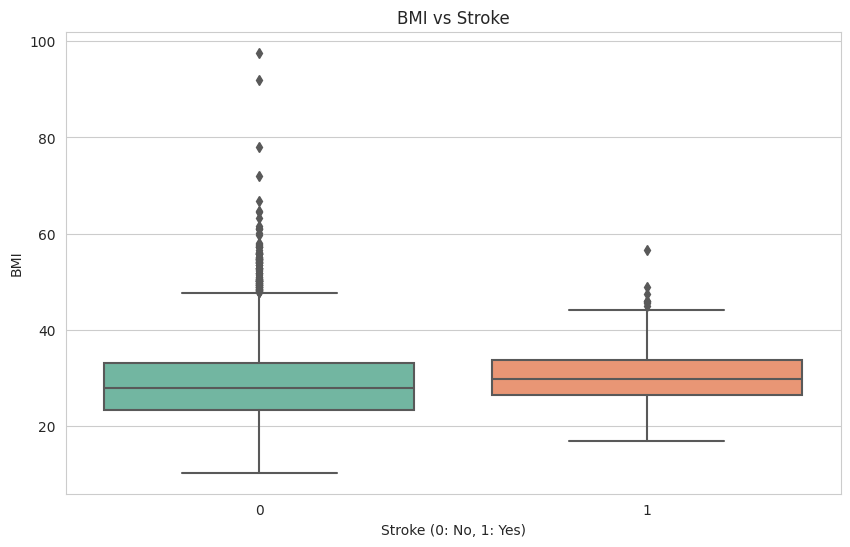

In [10]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=df, palette='Set2')
plt.title('BMI vs Stroke')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.show()


In [11]:
#Since BMI has outliers, performing median outlier imputation 
X_train['bmi'] = X_train['bmi'].fillna( X_train['bmi'].median()) 
X_test['bmi'] = X_test['bmi'].fillna( X_test['bmi'].median())

In [12]:
#Concatenate X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

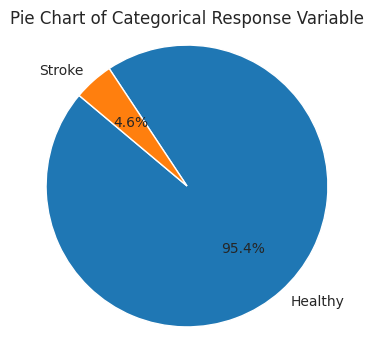

In [13]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = train_df['stroke'].value_counts()

# Replace 0 with 'Healthy' and 1 with 'Stroke'
response_labels = ['Healthy' if label == 0 else 'Stroke' for label in response_counts.index]

# Plot the pie chart with modified labels
plt.figure(figsize=(4, 4))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categorical Response Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

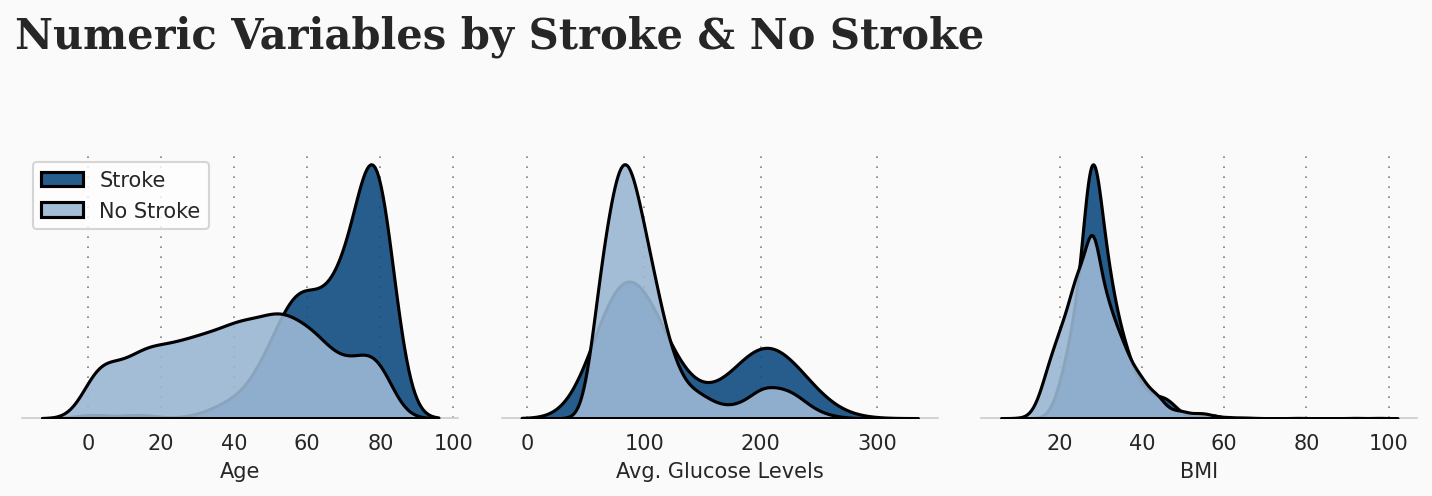

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = [variable for variable in train_df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

background_color = "#fafafa"
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = train_df[train_df['stroke'] == 1]
ns = train_df[train_df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', fill=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', fill=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

# Set labels for subplots
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

# Add legend
ax0.legend(['Stroke', 'No Stroke'], loc='upper left')

# Add title
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

In [15]:
from scipy.stats import kruskal

# Numerical predictors
num_predictors = ['age', 'avg_glucose_level', 'bmi']

# Dictionary to store p-values
p_values = {}

# Loop through each numerical predictor
for predictor in num_predictors:
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*[group[predictor] for name, group in train_df.groupby('stroke')])
    
    # Store p-value in the dictionary
    p_values[predictor] = p_value

# Print p-values
for predictor, p_value in p_values.items():
    print(f'Kruskal-Wallis test p-value for {predictor}: {p_value}')

Kruskal-Wallis test p-value for age: 1.8399917920039157e-53
Kruskal-Wallis test p-value for avg_glucose_level: 3.401463216856164e-08
Kruskal-Wallis test p-value for bmi: 0.0011299901120693807


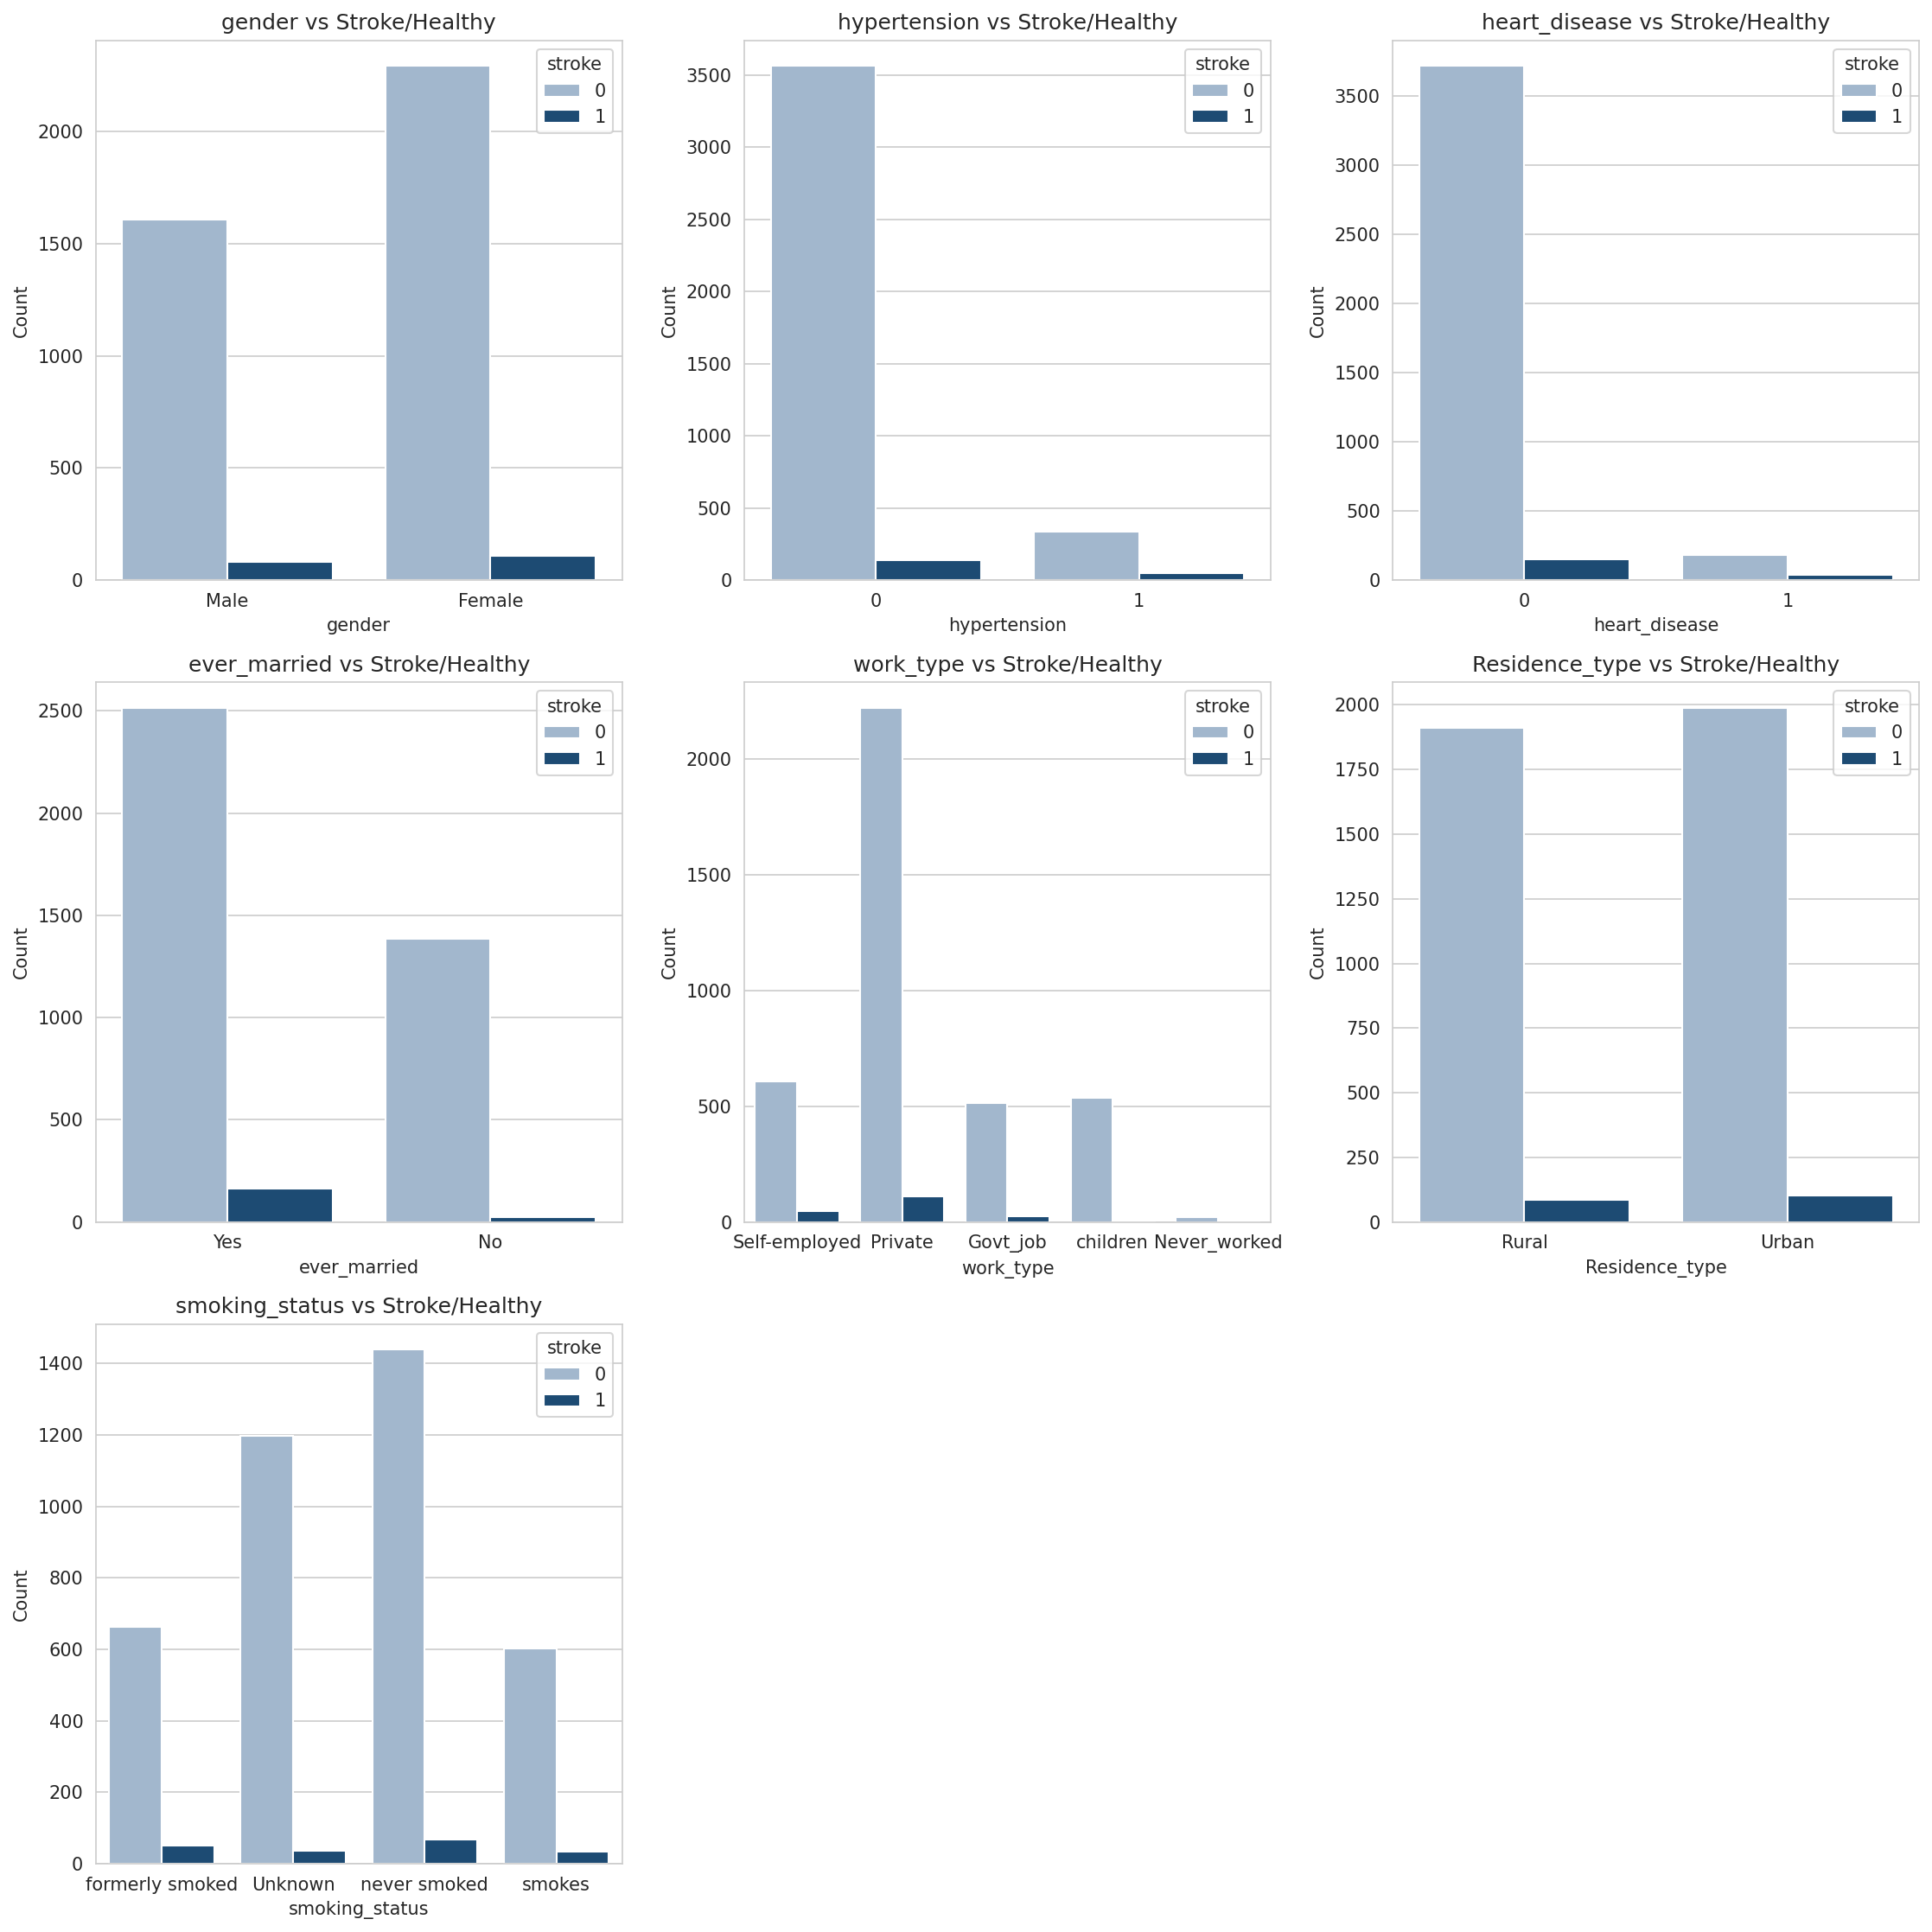

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical predictors
cat_predictors = [variable for variable in train_df.columns if variable not in ['id','stroke','age','avg_glucose_level','bmi']]

# Calculate the number of rows and columns needed based on the number of predictors
num_rows = len(cat_predictors) // 3 + (len(cat_predictors) % 3 > 0)  # Round up to the nearest integer
num_cols = min(len(cat_predictors), 3)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows), dpi=150)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical predictor
for i, predictor in enumerate(cat_predictors):
    # Create countplot
    sns.countplot(x=predictor, hue='stroke', data=train_df, ax=axes[i], palette={0: '#9bb7d4', 1: '#0f4c81'})
    
    # Set labels and title
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{predictor} vs Stroke/Healthy')

# Hide unused subplots
for j in range(len(cat_predictors), num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import chi2_contingency

# Categorical predictors
cat_predictors = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Dictionary to store p-values
chi2_p_values = {}

# Loop through each categorical predictor
for predictor in cat_predictors:
    # Create a contingency table
    contingency_table = pd.crosstab(train_df[predictor], train_df['stroke'])
    
    # Perform Chi-square test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Store p-value in the dictionary
    chi2_p_values[predictor] = p_value

# Print p-values
for predictor, p_value in chi2_p_values.items():
    print(f'Chi-square test p-value for {predictor}: {p_value}')

Chi-square test p-value for gender: 0.7230663463621134
Chi-square test p-value for hypertension: 1.1314308754364049e-13
Chi-square test p-value for heart_disease: 1.7460827133651004e-16
Chi-square test p-value for ever_married: 7.851243552462494e-10
Chi-square test p-value for work_type: 6.527155273536079e-07
Chi-square test p-value for Residence_type: 0.380978610308659
Chi-square test p-value for smoking_status: 0.00042497854923760923


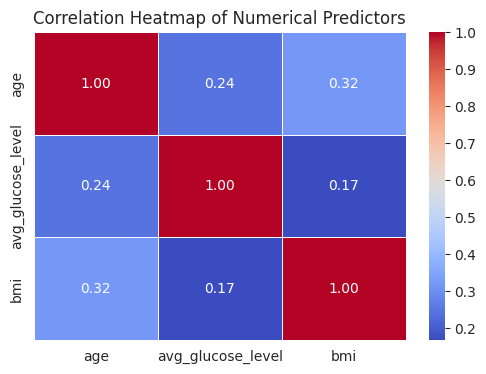

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical predictors
num_predictors = ['age', 'avg_glucose_level', 'bmi']

# Calculate the correlation matrix
corr_matrix = train_df[num_predictors].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Predictors')
plt.show()

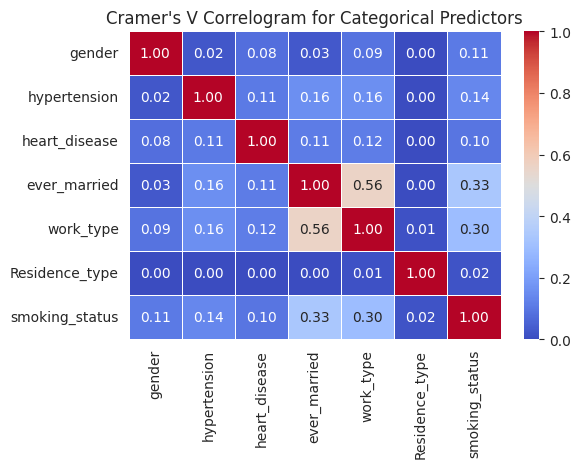

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Categorical predictors
cat_predictors = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Compute Cramer's V values
cramer_v_matrix = pd.DataFrame(index=cat_predictors, columns=cat_predictors)

for i, predictor1 in enumerate(cat_predictors):
    for j, predictor2 in enumerate(cat_predictors):
        confusion_matrix = pd.crosstab(train_df[predictor1], train_df[predictor2])
        cramer_v_matrix.iloc[i, j] = cramers_v(confusion_matrix)

cramer_v_matrix = cramer_v_matrix.apply(pd.to_numeric)

# Plot the correlogram
plt.figure(figsize=(6, 4))
sns.heatmap(cramer_v_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cramer's V Correlogram for Categorical Predictors")
plt.show()

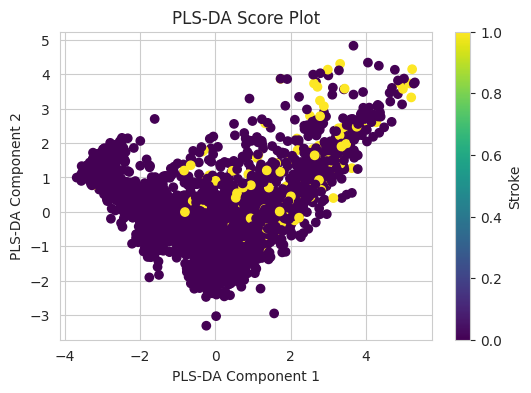

In [20]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Fit a PLS-DA model
plsda = PLSRegression(n_components=2)
plsda.fit(X_train_encoded, y_train)

# Transform the predictors using the fitted model
X_plsda = plsda.transform(X_train_encoded)

# Plot the PLS-DA score plot
plt.figure(figsize=(6, 4))
plt.scatter(X_plsda[:, 0], X_plsda[:, 1], c=y_train, cmap='viridis')
plt.title('PLS-DA Score Plot')
plt.xlabel('PLS-DA Component 1')
plt.ylabel('PLS-DA Component 2')
plt.colorbar(label='Stroke')
plt.grid(True)
plt.show()

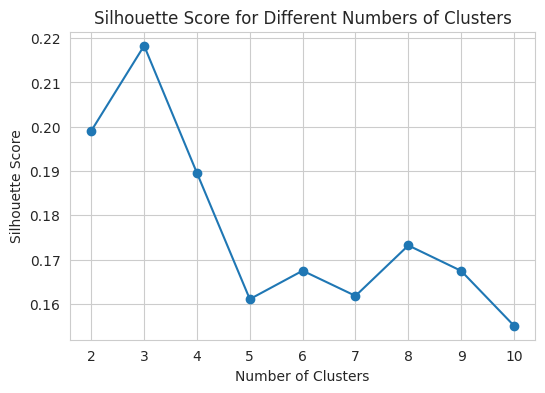

Optimal number of clusters: 3


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns =  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # numerical_columns should contain the names of numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # categorical_columns should contain the names of categorical columns
    ])

# Fit and transform the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# List to store silhouette scores
silhouette_scores = []

# Define range of clusters to try
min_clusters = 2
max_clusters = 10

# Calculate silhouette score for each number of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_processed)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_train_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters
print("Optimal number of clusters:", optimal_clusters)

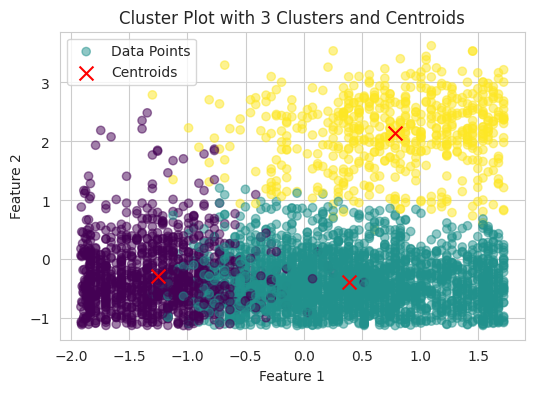

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns =  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # numerical_columns should contain the names of numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # categorical_columns should contain the names of categorical columns
    ])

# Fit and transform the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# Fit KMeans clustering model with optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 10)
kmeans.fit(X_train_processed)

# Plot the clusters and centroids
plt.figure(figsize=(6,4))

# Plot data points
plt.scatter(X_train_processed[:, 0], X_train_processed[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Data Points')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('Cluster Plot with 3 Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#Mean imputation on bmi
X_train['bmi'] = X_train['bmi'].fillna( X_train['bmi'].median())
X_test['bmi'] = X_test['bmi'].fillna( X_test['bmi'].median())

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score

In [25]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [26]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_model = LogisticRegression()

# Define the pipeline including logistic regression classifier
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for logistic regression
    ('classifier', logistic_model)
])

# Fit the model on the training data
logistic_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_logistic = logistic_pipeline.predict(X_train)
y_test_pred_logistic = logistic_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
train_f1_logistic = f1_score(y_train, y_train_pred_logistic)
test_f1_logistic = f1_score(y_test, y_test_pred_logistic)

print(f'Train Accuracy (Logistic Regression): {train_accuracy_logistic:.6f}')
print(f'Test Accuracy (Logistic Regression): {test_accuracy_logistic:.6f}')
print(f'Train F1 Score (Logistic Regression): {train_f1_logistic:.6f}')
print(f'Test F1 Score (Logistic Regression): {test_f1_logistic:.6f}')

Train Accuracy (Logistic Regression): 0.954501
Test Accuracy (Logistic Regression): 0.939335
Train F1 Score (Logistic Regression): 0.010638
Test F1 Score (Logistic Regression): 0.000000


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Define the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier model
knn_model = KNeighborsClassifier()

# Define the pipeline including the scaler and KNN classifier
knn_pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for KNN
    ('classifier', knn_model)
])

# Define the grid of hyperparameters to test
param_grid = {
    'classifier__n_neighbors': [5, 10, 15, 20],  # Set a range of values for 'k'
}

# Define scoring metrics for cross-validation
scoring_metrics = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='macro'),  # Using macro average for F1 score
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')

# Fit the GridSearchCV model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Test accuracy and F1 score for the best model
test_accuracy = best_knn_model.score(X_test, y_test)

y_test_pred = best_knn_model.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)  # Using macro average for F1 score

# Print test results
print(f"Best KNN parameters: {best_params}")
print(f"Test Accuracy: {test_accuracy:.6f}")
print(f"Test F1 Score: {test_f1:.6f}")

Best KNN parameters: {'classifier__n_neighbors': 20}
Test Accuracy: 0.939335
Test F1 Score: 0.000000


In [28]:
from sklearn.neighbors import KNeighborsClassifier
# Define the KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=20)
# Define the pipeline including KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for KNN
    ('classifier', knn_model)
])

# Fit the model on the training data
knn_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_knn = knn_pipeline.predict(X_train)
y_test_pred_knn = knn_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
train_f1_knn = f1_score(y_train, y_train_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

print(f'Train Accuracy (KNN): {train_accuracy_knn:.6f}')
print(f'Test Accuracy (KNN): {test_accuracy_knn:.6f}')
print(f'Train F1 Score (KNN): {train_f1_knn:.6f}')
print(f'Test F1 Score (KNN): {test_f1_knn:.6f}')


Train Accuracy (KNN): 0.954256
Test Accuracy (KNN): 0.939335
Train F1 Score (KNN): 0.010582
Test F1 Score (KNN): 0.000000


In [29]:
from sklearn.svm import SVC
# Define the SVM classifier model
svm_model = SVC(kernel='rbf', random_state=42)  # Example: Using a radial basis function (RBF) kernel

# Define the pipeline including SVM classifier
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for SVM
    ('classifier', svm_model)
])

# Fit the model on the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_svm = svm_pipeline.predict(X_train)
y_test_pred_svm = svm_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
train_f1_svm = f1_score(y_train, y_train_pred_svm)
test_f1_svm = f1_score(y_test, y_test_pred_svm)

print(f'Train Accuracy (SVM): {train_accuracy_svm:.6f}')
print(f'Test Accuracy (SVM): {test_accuracy_svm:.6f}')
print(f'Train F1 Score (SVM): {train_f1_svm:.6f}')
print(f'Test F1 Score (SVM): {test_f1_svm:.6f}')


Train Accuracy (SVM): 0.954746
Test Accuracy (SVM): 0.939335
Train F1 Score (SVM): 0.021164
Test F1 Score (SVM): 0.000000


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest classifier model
random_forest_model = RandomForestClassifier(n_estimators=150, random_state=42,max_depth=10,min_samples_split=5)

# Define the pipeline including Random Forest classifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('classifier', random_forest_model)
])

# Fit the model on the training data
random_forest_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_rf = random_forest_pipeline.predict(X_train)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Make predictions on the training and testing sets
y_train_pred_rf = random_forest_pipeline.predict(X_train)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print(f'Train Accuracy (Random Forest): {train_accuracy_rf:.6f}')
print(f'Test Accuracy (Random Forest): {test_accuracy_rf:.6f}')
print(f'Train F1 Score (Random Forest): {train_f1_rf:.6f}')
print(f'Test F1 Score (Random Forest): {test_f1_rf:.6f}')


Train Accuracy (Random Forest): 0.957436
Test Accuracy (Random Forest): 0.939335
Train F1 Score (Random Forest): 0.130000
Test F1 Score (Random Forest): 0.000000


In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(objective='binary:logistic',random_state=42)

# Define the pipeline including XGBoost model
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('classifier', xgboost_model)
])

# Fit the model on the training data
xgboost_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_xgb = xgboost_pipeline.predict(X_train)
y_test_pred_xgb = xgboost_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

print(f'Train Accuracy (XGBoost): {train_accuracy_xgb:.6f}')
print(f'Test Accuracy (XGBoost): {test_accuracy_xgb:.6f}')
print(f'Train F1 Score (XGBoost): {train_f1_xgb:.6f}')
print(f'Test F1 Score (XGBoost): {test_f1_xgb:.6f}')

Train Accuracy (XGBoost): 0.999511
Test Accuracy (XGBoost): 0.934442
Train F1 Score (XGBoost): 0.994624
Test F1 Score (XGBoost): 0.129870


In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
top_feature_names = [feature for feature, _ in sorted_feature_importances[:6]]
X_train_onehot = preprocessor.fit_transform(X_train)
X_test_onehot = preprocessor.fit_transform(X_test)
onehot_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
onehot_feature_names_train = onehot_feature_names[onehot_feature_names != 'gender_Other']
X_train_onehot_df = pd.DataFrame(X_train_onehot,columns = list(onehot_feature_names_train)+list(numeric_features))
X_test_onehot_df = pd.DataFrame(X_test_onehot,columns = list(onehot_feature_names)+list(numeric_features))
X_train_top = X_train_onehot_df[list(top_feature_names)]
X_test_top = X_test_onehot_df[list(top_feature_names)]

# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the pipeline including XGBoost model with top features
xgboost_pipeline_top_features = Pipeline(steps=[
    ('classifier', xgboost_model)
])
# Fit the model on the transformed training data with one-hot encoded format
xgboost_pipeline_top_features.fit(X_train_top, y_train)

# Make predictions on the training and testing sets
y_train_pred_xgb_top = xgboost_pipeline_top_features.predict(X_train_top)
y_test_pred_xgb_top = xgboost_pipeline_top_features.predict(X_test_top)

# Calculate accuracy for training and testing sets
train_accuracy_xgb_top = accuracy_score(y_train, y_train_pred_xgb_top)
test_accuracy_xgb_top = accuracy_score(y_test, y_test_pred_xgb_top)
train_f1_xgb_top = f1_score(y_train, y_train_pred_xgb_top)
test_f1_xgb_top = f1_score(y_test, y_test_pred_xgb_top)


print(f'Train Accuracy (XGBoost with top features): {train_accuracy_xgb_top:.6f}')
print(f'Test Accuracy (XGBoost with top features): {test_accuracy_xgb_top:.6f}')
print(f'Train F1 Score (XGBoost with top features): {train_f1_xgb_top:.6f}')
print(f'Test F1 Score (XGBoost with top features): {test_f1_xgb_top:.6f}')


NameError: name 'sorted_feature_importances' is not defined

In [ ]:

!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X_train_onehot = preprocessor.fit_transform(X_train)
X_test_onehot = preprocessor.fit_transform(X_test)
onehot_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
onehot_feature_names_train = onehot_feature_names[onehot_feature_names != 'gender_Other']
X_train_onehot_df = pd.DataFrame(X_train_onehot,columns = list(numeric_features)+list(onehot_feature_names_train))
X_test_onehot_df = pd.DataFrame(X_test_onehot,columns = list(numeric_features) +list(onehot_feature_names))
X_test_onehot_df.drop(columns=['gender_Other'], inplace=True)


# Assuming 'X' and 'y' are your feature and target variables
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_onehot, y_train)
X_smote_df = pd.DataFrame(X_smote, columns=X_train_onehot_df.columns)


In [ ]:
#XGBOOST WITH SMOTE
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(objective='binary:logistic',random_state=42)

# Define the pipeline including XGBoost model
xgboost_pipeline = Pipeline(steps=[
    ('classifier', xgboost_model)
])

# Fit the model on the training data
xgboost_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_xgb = xgboost_pipeline.predict(X_smote_df)
y_test_pred_xgb = xgboost_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_xgb = accuracy_score(y_smote, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
train_f1_xgb = f1_score(y_smote, y_train_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

print(f'Train Accuracy (XGBoost): {train_accuracy_xgb:.6f}')
print(f'Test Accuracy (XGBoost): {test_accuracy_xgb:.6f}')
print(f'Train F1 Score (XGBoost): {train_f1_xgb:.6f}')
print(f'Test F1 Score (XGBoost): {test_f1_xgb:.6f}')

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_xgb)

# Calculate class-wise accuracy
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Output the class-wise accuracy
for i, acc in enumerate(class_accuracies):
    print(f'Class {i} Accuracy: {acc:.6f}')

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = xgboost_pipeline.named_steps['classifier'].feature_importances_

# Get the names of the features
feature_names = X_smote_df.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Get the top N important predictors
N = 10  # Adjust as needed
top_features = sorted_feature_names[:N]
top_importances = importances[indices][:N]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances: XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define the top N important predictors
N = 10  # Adjust as needed
top_features = sorted_feature_names[:N]

# Extract top features from the datasets
X_smote_top = X_smote_df[top_features]
X_test_top = X_test_onehot_df[top_features]

# Define the XGBoost model with top features
xgboost_model_top = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the pipeline including XGBoost model with top features
xgboost_pipeline_top = Pipeline(steps=[
    ('classifier', xgboost_model_top)
])

# Fit the model on the training data with top features
xgboost_pipeline_top.fit(X_smote_top, y_smote)
# Make predictions on the training and testing sets
y_train_pred_xgb_top = xgboost_pipeline_top.predict(X_smote_top)
y_test_pred_xgb_top = xgboost_pipeline_top.predict(X_test_top)

# Calculate accuracy for training and testing sets with top features
train_accuracy_xgb_top = accuracy_score(y_smote, y_train_pred_xgb_top)
test_accuracy_xgb_top = accuracy_score(y_test, y_test_pred_xgb_top)
train_f1_xgb_top = f1_score(y_smote, y_train_pred_xgb_top)
test_f1_xgb_top = f1_score(y_test, y_test_pred_xgb_top)

print(f'Train Accuracy (XGBoost with Top Features): {train_accuracy_xgb_top:.6f}')
print(f'Test Accuracy (XGBoost with Top Features): {test_accuracy_xgb_top:.6f}')
print(f'Train F1 Score (XGBoost with Top Features): {train_f1_xgb_top:.6f}')
print(f'Test F1 Score (XGBoost with Top Features): {test_f1_xgb_top:.6f}')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150,max_depth=10,min_samples_split=5,random_state=42)

# Define the pipeline including Random Forest model
rf_pipeline = Pipeline(steps=[
    ('classifier', rf_model)
])

# Fit the model on the SMOTE training data
rf_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_rf = rf_pipeline.predict(X_smote_df)
y_test_pred_rf = rf_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_rf = accuracy_score(y_smote, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_f1_rf = f1_score(y_smote, y_train_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)


print(f'Train Accuracy (Random Forest): {train_accuracy_rf:.6f}')
print(f'Test Accuracy (Random Forest): {test_accuracy_rf:.6f}')
print(f'Train F1 Score (Random Forest): {train_f1_rf:.6f}')
print(f'Test F1 Score (Random Forest): {test_f1_rf:.6f}')

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Get the names of the features
feature_names = X_smote_df.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Get the top N important predictors
N = 10  # Adjust as needed
top_features = sorted_feature_names[:N]
top_importances = importances[indices][:N]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances: Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Define the pipeline including logistic regression model
logistic_pipeline = Pipeline(steps=[
    ('classifier', logistic_model)
])

# Fit the model on the SMOTE training data
logistic_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_logistic = logistic_pipeline.predict(X_smote_df)
y_test_pred_logistic = logistic_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_logistic = accuracy_score(y_smote, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
train_f1_logistic = f1_score(y_smote, y_train_pred_logistic)
test_f1_logistic = f1_score(y_test, y_test_pred_logistic)


print(f'Train Accuracy (Logistic Regression): {train_accuracy_logistic:.6f}')
print(f'Test Accuracy (Logistic Regression): {test_accuracy_logistic:.6f}')
print(f'Train F1 Score (Logistic Regression): {train_f1_logistic:.6f}')
print(f'Test F1 Score (Logistic Regression): {test_f1_logistic:.6f}')

In [ ]:
logistic_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the test set
y_test_pred_logistic = logistic_pipeline.predict(X_test_onehot_df)

# Calculate the confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_test_pred_logistic)

# Calculate class-wise accuracy
class_accuracies_logistic = conf_matrix_logistic.diagonal() / conf_matrix_logistic.sum(axis=1)

# Output the class-wise accuracy
for i, acc in enumerate(class_accuracies_logistic):
    print(f'Class {i} Accuracy: {acc:.6f}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

# Define the top N important predictors
N = 10  # Adjust as needed
top_features_rf = sorted_feature_names[:N]

# Extract top features from the datasets
X_smote_top_rf = X_smote_df[top_features_rf]
X_test_top_rf = X_test_onehot_df[top_features_rf]

# Define the Random Forest model with top features
rf_model_top = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=5, random_state=42)

# Define the pipeline including Random Forest model with top features
rf_pipeline_top = Pipeline(steps=[
    ('classifier', rf_model_top)
])

# Fit the model on the training data with top features
rf_pipeline_top.fit(X_smote_top_rf, y_smote)

# Make predictions on the training and testing sets
y_train_pred_rf_top = rf_pipeline_top.predict(X_smote_top_rf)
y_test_pred_rf_top = rf_pipeline_top.predict(X_test_top_rf)
# Calculate accuracy for training and testing sets with top features
train_accuracy_rf_top = accuracy_score(y_smote, y_train_pred_rf_top)
test_accuracy_rf_top = accuracy_score(y_test, y_test_pred_rf_top)
train_f1_rf_top = f1_score(y_smote, y_train_pred_rf_top)
test_f1_rf_top = f1_score(y_test, y_test_pred_rf_top)

print(f'Train Accuracy (Random Forest with Top Features): {train_accuracy_rf_top:.6f}')
print(f'Test Accuracy (Random Forest with Top Features): {test_accuracy_rf_top:.6f}')
print(f'Train F1 Score (Random Forest with Top Features): {train_f1_rf_top:.6f}')
print(f'Test F1 Score (Random Forest with Top Features): {test_f1_rf_top:.6f}')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the pipeline including SVM model
svm_pipeline = Pipeline(steps=[
    ('classifier', svm_model)
])

# Fit the model on the SMOTE training data
svm_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_svm = svm_pipeline.predict(X_smote_df)
y_test_pred_svm = svm_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_svm = accuracy_score(y_smote, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
train_f1_svm = f1_score(y_smote, y_train_pred_svm)
test_f1_svm = f1_score(y_test, y_test_pred_svm)


print(f'Train Accuracy (SVM): {train_accuracy_svm:.6f}')
print(f'Test Accuracy (SVM): {test_accuracy_svm:.6f}')
print(f'Train F1 Score (SVM): {train_f1_svm:.6f}')
print(f'Test F1 Score (SVM): {test_f1_svm:.6f}')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the pipeline with KNN
knn_pipeline = Pipeline(steps=[
    ('classifier', knn_model)
])

# Define the grid of hyperparameters to test for Grid Search CV
param_grid = {
    'classifier__n_neighbors': [5, 10, 15, 20],  # The possible values for k
}

# Define scoring metrics for Grid Search CV
scoring_metrics = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='macro'),  # Using macro average for multi-class
}
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring=scoring_metrics,  # You can include multiple metrics for scoring
    refit='accuracy',         # Choose the best model based on accuracy
    return_train_score=True
)

# Fit GridSearchCV to the SMOTE training data
grid_search.fit(X_smote_df, y_smote)

# Get the best model and its parameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the testing set
y_test_pred_knn = best_knn_model.predict(X_test_onehot_df)

# Calculate accuracy and F1 score for the testing set
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

print(f"Optimal KNN Parameters: {best_params}")
print(f"Test Accuracy (KNN): {test_accuracy_knn:.6f}")
print(f"Test F1 Score (KNN): {test_f1_knn:.6f}")


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the pipeline including KNN model
knn_pipeline = Pipeline(steps=[
    ('classifier', knn_model)
])

# Fit the model on the SMOTE training data
knn_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_knn = knn_pipeline.predict(X_smote_df)
y_test_pred_knn = knn_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_knn = accuracy_score(y_smote, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
train_f1_knn = f1_score(y_smote, y_train_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)
print(f'Train Accuracy (KNN): {train_accuracy_knn:.6f}')
print(f'Test Accuracy (KNN): {test_accuracy_knn:.6f}')
print(f'Train F1 Score (KNN): {train_f1_knn:.6f}')
print(f'Test F1 Score (KNN): {test_f1_knn:.6f}')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class from each model
xgboost_probs = xgboost_pipeline.named_steps['classifier'].predict_proba(X_test_onehot_df)[:, 1]
logreg_probs = logistic_pipeline.named_steps['classifier'].predict_proba(X_test_onehot_df)[:, 1]
svm_probs = svm_pipeline.named_steps['classifier'].decision_function(X_test_onehot_df)
knn_probs = knn_pipeline.named_steps['classifier'].predict_proba(X_test_onehot_df)[:, 1]

# Calculate the ROC curves and AUC-ROC scores
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_probs)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

auc_roc_xgboost = roc_auc_score(y_test, xgboost_probs)
auc_roc_logreg = roc_auc_score(y_test, logreg_probs)
auc_roc_svm = roc_auc_score(y_test, svm_probs)
auc_roc_knn = roc_auc_score(y_test, knn_probs)
# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost (AUC-ROC: {auc_roc_xgboost:.2f})', color='skyblue')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC-ROC: {auc_roc_logreg:.2f})', color='orange')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC-ROC: {auc_roc_svm:.2f})', color='green')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC-ROC: {auc_roc_knn:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', lw=0.5)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Multiple Models')
plt.legend(loc='lower right')
plt.show()

# Display the AUC-ROC scores
print(f'AUC-ROC Score for XGBoost: {auc_roc_xgboost:.6f}')
print(f'AUC-ROC Score for Logistic Regression: {auc_roc_logreg:.6f}')
print(f'AUC-ROC Score for SVM: {auc_roc_svm:.6f}')
print(f'AUC-ROC Score for KNN: {auc_roc_knn:.6f}')


In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),

])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X_train_onehot = preprocessor2.fit_transform(X_train)
X_test_onehot = preprocessor2.fit_transform(X_test)
onehot_feature_names = preprocessor2.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
onehot_feature_names_train = onehot_feature_names[onehot_feature_names != 'gender_Other']
X_train_onehot_df = pd.DataFrame(X_train_onehot,columns = list(numeric_features)+list(onehot_feature_names_train))
X_test_onehot_df = pd.DataFrame(X_test_onehot,columns = list(numeric_features)+list(onehot_feature_names))
X_test_onehot_df.drop(columns=['gender_Other'], inplace=True)


# Assuming 'X' and 'y' are your feature and target variables
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_onehot, y_train)
X_smote_df = pd.DataFrame(X_smote, columns=X_train_onehot_df.columns)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Define the pipeline including logistic regression model
logistic_pipeline = Pipeline(steps=[
    ('classifier', logistic_model)
])

# Fit the model on the SMOTE training data
logistic_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_logistic = logistic_pipeline.predict(X_smote_df)
y_test_pred_logistic = logistic_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_logistic = accuracy_score(y_smote, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
train_f1_logistic = f1_score(y_smote, y_train_pred_logistic)
test_f1_logistic = f1_score(y_test, y_test_pred_logistic)
print(f'Train Accuracy (Logistic Regression): {train_accuracy_logistic:.6f}')
print(f'Test Accuracy (Logistic Regression): {test_accuracy_logistic:.6f}')
print(f'Train F1 Score (Logistic Regression): {train_f1_logistic:.6f}')
print(f'Test F1 Score (Logistic Regression): {test_f1_logistic:.6f}')

In [ ]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# Assuming logistic_pipeline is your fitted logistic regression pipeline
# Assuming X_train_onehot_df is your feature matrix after preprocessing

# Specify the features for which you want to create partial dependence plots
features = ['age', 'avg_glucose_level', 'bmi']

# Compute partial dependence for the specified features
partial_dependence_results = partial_dependence(
    logistic_pipeline.named_steps['classifier'],  # Reference to your classifier in the pipeline
    X_train_onehot_df,  # The data used for training
    features=features,
    grid_resolution=10  # Number of points to evaluate along each feature
)

# Create and display the partial dependence plots
pdp_display = PartialDependenceDisplay.from_estimator(
    logistic_pipeline.named_steps['classifier'],
    X_train_onehot_df,
    features  # The features to plot
)


